<a href="https://colab.research.google.com/github/Tiziri-k/SIC-exercices/blob/master/quiz/problem_0503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [ ]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [ ]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). Code the helper function 'show_data()' that visualizes each given observation. HINT: use matplotlib.pyplot.imshow() and scipy.ndimage.interpolation().

In [ ]:
def show_data(X, Y, n, angle=0):
    img = X[n].reshape((28,28))
    img=rotate(img, angle)
    plt.imshow(img, cmap="Greys")
    plt.show()

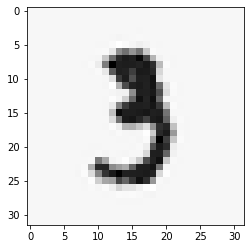

In [ ]:
# Example 1.
show_data(X_train, Y_train,10,+10)

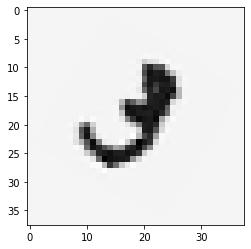

In [ ]:
# Example 2.
show_data(X_train, Y_train,10,-30)

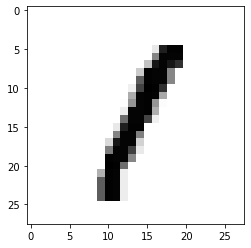

In [ ]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [ ]:
from sklearn.model_selection import cross_val_score
l = [XGBClassifier(),KNeighborsClassifier(),DecisionTreeClassifier()]
score=[]

for i in l :
    m=cross_val_score(i,X_train, Y_train, cv=5).mean()
    print('accuray mean : ',m)

accuray mean :  0.6499999999999999
accuray mean :  0.74
accuray mean :  0.47000000000000003


In [ ]:
# we choose the KNN algorithm 

param_grid = {'n_neighbors': np.arange(1,29),'metric':['euclidean','manhanttan'] }
score = GridSearchCV(KNeighborsClassifier(), param_grid,cv=5)
score.fit(X_train,Y_train)
score.best_estimator_ , score.best_score_

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                      metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                      weights='uniform'), 0.8400000000000001)

4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).

---


- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

In [ ]:
len(data_train)

100

In [ ]:
import random 

random.seed(123)
data_train= rotate(data_train,5)
x_train = np.array(data_train)
y_train = np.array(data_train)


In [ ]:
len(X_train)


168

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [ ]:
# we choose the KNN algorithm 
param_grid = {'n_neighbors': np.arange(1,29),'metric':['euclidean','manhanttan'] }
score = GridSearchCV(KNeighborsClassifier(), param_grid,cv=5)
score.fit(X_train, Y_train)
score.best_estimator_ , score.best_score_

(KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                      metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                      weights='uniform'), 0.8400000000000001)